<a href="https://www.kaggle.com/code/kirtimathur/supermarket-sales-eda?scriptVersionId=114714947" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv


#### Reading the dataset

In [2]:
df=pd.read_csv("/kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv")

# Basic understanding of data

#### Shape of data

In [3]:
df.shape

(1000, 17)

#### Sample of data

In [4]:
df.sample(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
570,834-83-1826,B,Mandalay,Member,Female,Home and lifestyle,82.04,5,20.5100,430.7100,2/25/2019,17:16,Credit card,410.20,4.761905,20.5100,7.6
349,400-45-1220,B,Mandalay,Normal,Female,Health and beauty,13.50,10,6.7500,141.7500,2/27/2019,11:06,Credit card,135.00,4.761905,6.7500,4.8
14,829-34-3910,A,Yangon,Normal,Female,Health and beauty,71.38,10,35.6900,749.4900,3/29/2019,19:21,Cash,713.80,4.761905,35.6900,5.7
197,856-22-8149,A,Yangon,Normal,Female,Home and lifestyle,25.29,1,1.2645,26.5545,3/23/2019,10:13,Ewallet,25.29,4.761905,1.2645,6.1
292,278-97-7759,A,Yangon,Member,Female,Electronic accessories,62.48,1,3.1240,65.6040,2/18/2019,20:29,Cash,62.48,4.761905,3.1240,4.7


#### Columns description
#####  Attributes Information

- Invoice id: Computer generated sales slip invoice identification number

- Branch: Branch of supercenter (3 branches are available identified by A, B and C).

- City: Location of supercenters

- Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.

- Gender: Gender type of customer

- Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel
- Unit price: Price of each product in 

- Quantity: Number of products purchased by customer

- Tax: 5% tax fee for customer buying

- Total: Total price including tax

- Date: Date of purchase (Record available from January 2019 to March 2019)

- Time: Purchase time (10am to 9pm)

- Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

- COGS: Cost of goods sold (total amount without tax)

- Gross margin percentage: Gross margin percentage
- Gross income: Gross income

- Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)



#### Mathematical definition of Total and Gross margin percentage

In [5]:
total=(df['Unit price']*df['Quantity'])+df['Tax 5%']
print(total.head())
gross_Margin=(df['Total']- df['cogs'])/df['Total']*(100)
print(gross_Margin.head())  # gross margin means profit percent

0    548.9715
1     80.2200
2    340.5255
3    489.0480
4    634.3785
dtype: float64
0    4.761905
1    4.761905
2    4.761905
3    4.761905
4    4.761905
dtype: float64


#### Information of data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

#### Unique values of each column and total number of those of unqiue values

In [7]:
for i in df.columns:
    print(i,",    Unique values:",df[i].unique(),",    Total unique values:",df[i].nunique())

Invoice ID ,    Unique values: ['750-67-8428' '226-31-3081' '631-41-3108' '123-19-1176' '373-73-7910'
 '699-14-3026' '355-53-5943' '315-22-5665' '665-32-9167' '692-92-5582'
 '351-62-0822' '529-56-3974' '365-64-0515' '252-56-2699' '829-34-3910'
 '299-46-1805' '656-95-9349' '765-26-6951' '329-62-1586' '319-50-3348'
 '300-71-4605' '371-85-5789' '273-16-6619' '636-48-8204' '549-59-1358'
 '227-03-5010' '649-29-6775' '189-17-4241' '145-94-9061' '848-62-7243'
 '871-79-8483' '149-71-6266' '640-49-2076' '595-11-5460' '183-56-6882'
 '232-16-2483' '129-29-8530' '272-65-1806' '333-73-7901' '777-82-7220'
 '280-35-5823' '554-53-8700' '354-25-5821' '228-96-1411' '617-15-4209'
 '132-32-9879' '370-41-7321' '727-46-3608' '669-54-1719' '574-22-5561'
 '326-78-5178' '162-48-8011' '616-24-2851' '778-71-5554' '242-55-6721'
 '399-46-5918' '106-35-6779' '635-40-6220' '817-48-8732' '120-06-4233'
 '285-68-5083' '803-83-5989' '347-34-2234' '199-75-8169' '853-23-2453'
 '877-22-3308' '838-78-4295' '109-28-2512' '23

# Preprocessing

#### Missing values column wise

In [8]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

- From above output we infer there are no missing values in the data

#### Checking data types of all columns

In [9]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

- From above we infer that we need to convert the Date and Time columns' type to datetime

#### Converting Date and Time column to datetime datatype

In [10]:
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
df["Time"]=pd.to_datetime(df["Time"])

*Verifying data types*

In [12]:
df.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                       datetime64[ns]
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

# Feature engineering

In [13]:
from datetime import datetime as dt
df["Days"]=df["Date"].dt.day_name()
df["Month"]=df["Date"].dt.month_name()
df["Weekday"]=df.Date.dt.weekday

In [14]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Days,Month,Weekday
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2022-12-25 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,Saturday,January,5
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2022-12-25 10:29:00,Cash,76.40,4.761905,3.8200,9.6,Friday,March,4
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2022-12-25 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,Sunday,March,6
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2022-12-25 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,Sunday,January,6
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2022-12-25 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,Friday,February,4


- Dropping irrelevant column Invoice Id(not required for analysis) and City(as it is the decoding form of branch)
* Branch----------   City
1. A---------        Yangon
2. B---------        Naypyitaw
3. C---------        Mandalay

In [15]:
l=["Invoice ID","City"]
df.drop(columns=l,inplace=True)

In [16]:
df.head()

,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Days,Month,Weekday
0,A,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2022-12-25 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,Saturday,January,5
1,C,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2022-12-25 10:29:00,Cash,76.40,4.761905,3.8200,9.6,Friday,March,4
2,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2022-12-25 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,Sunday,March,6
3,A,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2022-12-25 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,Sunday,January,6
4,A,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2022-12-25 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,Friday,February,4


# Insights

#### Descriptive Summary

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.672130,26.494628,10.080000,32.875000,55.230000,77.935000,99.960000
Quantity,1000.0,5.510000,2.923431,1.000000,3.000000,5.000000,8.000000,10.000000
Tax 5%,1000.0,15.379369,11.708825,0.508500,5.924875,12.088000,22.445250,49.650000
Total,1000.0,322.966749,245.885335,10.678500,124.422375,253.848000,471.350250,1042.650000
cogs,1000.0,307.587380,234.176510,10.170000,118.497500,241.760000,448.905000,993.000000
gross margin percentage,1000.0,4.761905,0.000000,4.761905,4.761905,4.761905,4.761905,4.761905
gross income,1000.0,15.379369,11.708825,0.508500,5.924875,12.088000,22.445250,49.650000
Rating,1000.0,6.972700,1.718580,4.000000,5.500000,7.000000,8.500000,10.000000
Weekday,1000.0,3.032000,1.973543,0.000000,1.000000,3.000000,5.000000,6.000000


- Min unit price is 10 and max unit price is 99
- There might be outliers present in Total, cogs and gross income columns, checking using boxplot

<Figure size 1050x210 with 0 Axes>

<Figure size 1050x210 with 0 Axes>

<Figure size 1050x210 with 0 Axes>

<Figure size 1050x210 with 0 Axes>

<Figure size 1050x210 with 0 Axes>

<Figure size 1050x210 with 0 Axes>

<Figure size 1050x210 with 0 Axes>

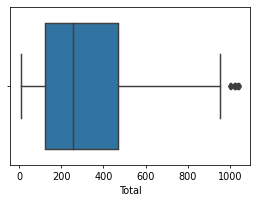

<Figure size 1050x210 with 0 Axes>

<Figure size 1050x210 with 0 Axes>

<Figure size 1050x210 with 0 Axes>

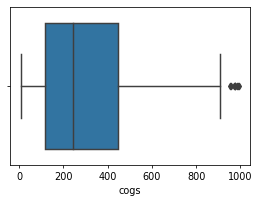

<Figure size 1050x210 with 0 Axes>

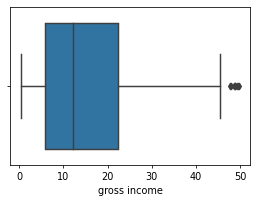

<Figure size 1050x210 with 0 Axes>

<Figure size 1050x210 with 0 Axes>

<Figure size 1050x210 with 0 Axes>

<Figure size 1050x210 with 0 Axes>

In [18]:
col=1
for i in df.columns:
    fig = plt.figure(figsize=(15,3),dpi=70)
    if(i=="Total")|(i=="cogs")|(i=="gross income"):
        plt.subplot(1,3,col) #col for indexing
        sns.boxplot(df[i])
        plt.xlabel(i) #label in i 
        col+=1
    plt.show()

- 3 outliers in all 3 columns (correlated)

#### Descriptive statistical summary of object data

In [19]:
df.describe(include="object").T

,count,unique,top,freq
Branch,1000,3,A,340
Customer type,1000,2,Member,501
Gender,1000,2,Female,501
Product line,1000,6,Fashion accessories,178
Payment,1000,3,Ewallet,345
Days,1000,7,Saturday,164
Month,1000,3,January,352


- Methods for correlation
    - perason: default
    - spearman: when data has outliers (it is rank based)

<AxesSubplot:>

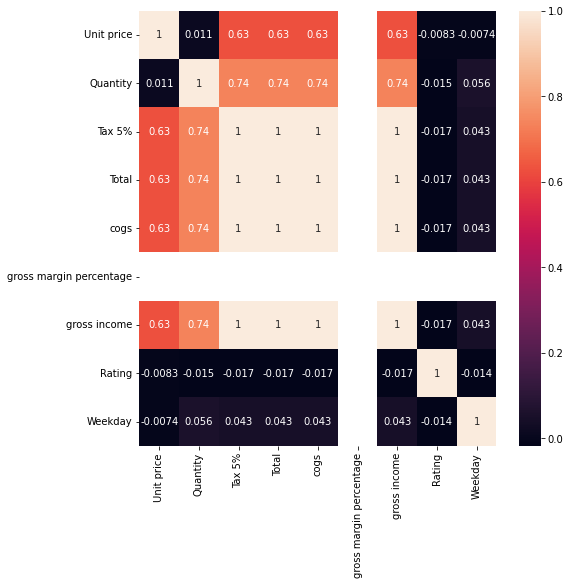

In [20]:
plt.figure(figsize=(8,8))
cor_matrix=df.corr(method="spearman")
sns.heatmap(cor_matrix,annot=True)

- tax 5%, total, cogs, and gross incomes are correlated (so use only 1, considering total column for further analysis)

#### Total sale and gross income of the company

In [21]:
print("Total sale of supermarket is:",df["Total"].sum())

Total sale of supermarket is: 322966.749


In [22]:
print("Total gross income of supermarket is:",df["gross income"].sum())

Total gross income of supermarket is: 15379.368999999999


-  322966.749 Dollars is the total sale.
- 15379.368999999999 Dollars is the total gross income.

#### Total sale and gross income of each branch

In [23]:
print(df.groupby("Branch")["Total"].agg(["sum","mean","min","max"]))

                sum        mean      min      max
Branch                                           
A       106200.3705  312.354031  12.6945  1039.29
B       106197.6720  319.872506  18.6375  1022.49
C       110568.7065  337.099715  10.6785  1042.65


- Maximum Total sale is recorded at branch C based on total and it is 110568.7065 dollars.
- Minimum Total sale is recorded at branch B based on total and it is 106197.6720 dollars
- Since max total sale is recorded as C branch, so further conidering it for analysis.

#### Month and date for maximum total sales at branch C

In [24]:
df_c=df[df["Branch"]=="C"]
df_c[df_c["Total"]==df_c["Total"].max()][["Month","Date","Total"]]

,Month,Date,Total
350,February,2019-02-15,1042.65


#### Category of customer and its corresponding product category for maximum total

In [25]:
df_c[df_c["Total"]==df_c["Total"].max()][["Branch","Date","Customer type","Product line"]]

,Branch,Date,Customer type,Product line
350,C,2019-02-15,Member,Fashion accessories


#### Category of customer and its corresponding product category for minimum total

In [26]:
df_c[df_c["Total"]==df_c["Total"].min()][["Branch","Date","Customer type","Product line"]]

,Branch,Date,Customer type,Product line
822,C,2019-02-07,Member,Sports and travel


#### Hot selling month

In [27]:
print(df.groupby(["Month"])["Total"].agg(["max","sum","min","mean"]).sort_values(by="mean",ascending=False))

              max         sum      min        mean
Month                                             
January   1034.46  116291.868  12.6945  330.374625
February  1042.65   97219.374  10.6785  320.856020
March     1022.49  109455.507  16.2750  317.262339


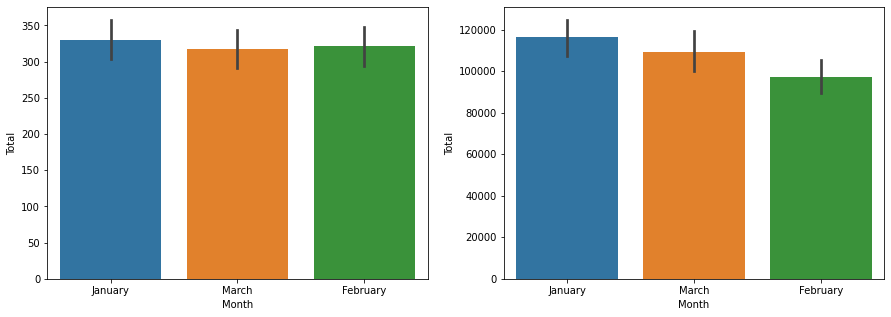

In [28]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(df["Month"],df["Total"],data=df)
plt.subplot(1,2,2)
sns.barplot(df["Month"],df["Total"],data=df,estimator=sum);

#### Hot selling month corresponding to each branch

In [29]:
print(df.groupby(["Branch","Month"])["Total"].agg(["max","sum","min","mean"]).sort_values(by="mean",ascending=False))

                      max         sum      min        mean
Branch Month                                              
C      March      943.299  37199.0430  17.0940  350.934368
B      January   1022.385  37176.0585  18.6375  334.919446
C      January   1034.460  40434.6810  13.4190  331.431811
       February  1042.650  32934.9825  10.6785  329.349825
A      January    931.035  38681.1285  12.6945  325.051500
       February  1039.290  29860.1205  19.2465  317.660856
B      February   853.146  34424.2710  30.9960  315.819000
       March     1022.490  34597.3425  26.7225  308.904844
A      March      951.825  37659.1215  16.2750  296.528516


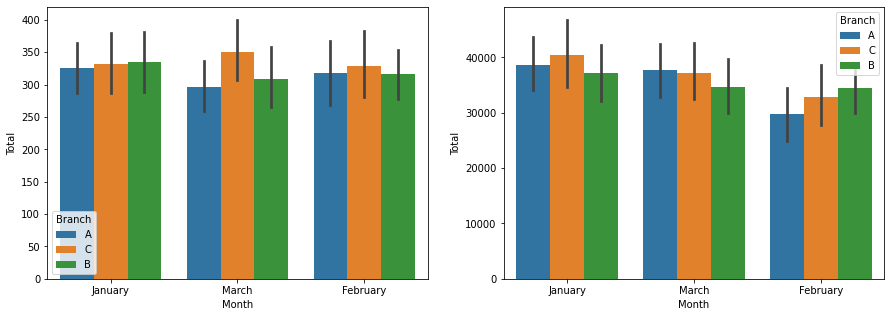

In [30]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(df["Month"],df["Total"],data=df,hue=df["Branch"]);
plt.subplot(1,2,2)
sns.barplot(df["Month"],df["Total"],data=df,hue=df["Branch"],estimator=sum);

- For Branch A, January is the hot selling month on the basis of mean.

- For Branch B, January is the hot selling month on the basis of mean

- For Branch C, March is the hot selling month on the basis of mean.

#### Total weekdays and weekend sale

In [31]:
df["Weekday"].unique()

array([5, 4, 6, 0, 3, 2, 1])

In [32]:
week_day=df[df["Weekday"]<=4]
weekend=df[df["Weekday"]>4]
print("Weekdays sale: ",week_day["Total"].sum())
print("Weekends sale: ",weekend["Total"].sum())

Weekdays sale:  222388.04700000002
Weekends sale:  100578.702


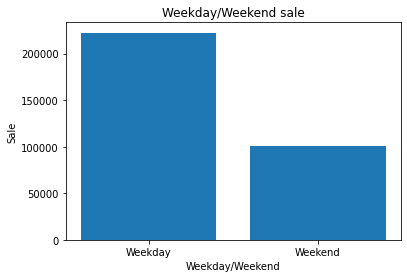

In [33]:
l1=[week_day["Total"].sum(),weekend["Total"].sum()]
l2=["Weekday","Weekend"]
plt.bar(l2,l1);
plt.title("Weekday/Weekend sale")
plt.xlabel("Weekday/Weekend")
plt.ylabel("Sale");

#### Weekday sale and weekend sale of each branches

In [34]:
week_day=df[df["Weekday"]<=4]
weekend=df[df["Weekday"]>4]
print("Weekdays sale of all branches:\n",week_day.groupby(["Branch"])["Total"].sum())
print("Weekends sale of all branches:\n",weekend.groupby(["Branch"])["Total"].sum())

Weekdays sale of all branches:
 Branch
A    72428.139
B    74497.920
C    75461.988
Name: Total, dtype: float64
Weekends sale of all branches:
 Branch
A    33772.2315
B    31699.7520
C    35106.7185
Name: Total, dtype: float64


- Weekday sale for all branches is greater than weekend sales.

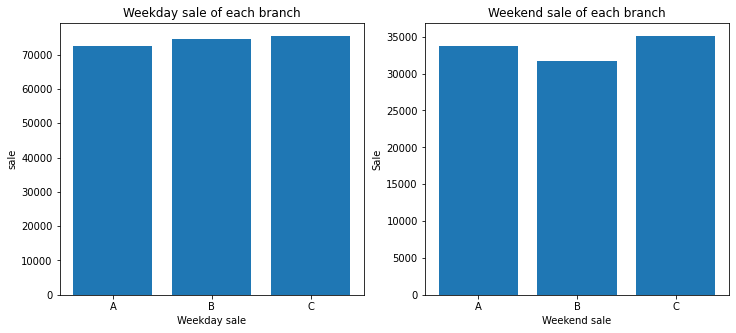

In [35]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.bar(week_day.groupby(["Branch"])["Total"].sum().index,week_day.groupby(["Branch"])["Total"].sum().values)
# grouby gives array, so can plot it directly
# fetching a attribute like index or values, in series, so no bracket after it, unlike a function
plt.title("Weekday sale of each branch")
plt.xlabel("Weekday sale")
plt.ylabel("sale")
plt.subplot(1,2,2)
plt.bar(weekend.groupby(["Branch"])["Total"].sum().index,weekend.groupby(["Branch"])["Total"].sum().values)
plt.title("Weekend sale of each branch")
plt.xlabel("Weekend sale")
plt.ylabel("Sale")
plt.show();

#### First weekend and weekday sale of each month for branch A

In [36]:
print("Sale trend of Branch A")
a=df[(df["Branch"]=="A")]
week_a=a[a["Weekday"]<5]
weekend_a=a[a["Weekday"]>=5]
print("Sale on week days in each month",week_a.groupby(["Month"])["Total"].sum())
print("Sale on weekend in each month",weekend_a.groupby(["Month"])["Total"].sum())

Sale trend of Branch A
Sale on week days in each month Month
February    20417.2395
January     25736.4870
March       26274.4125
Name: Total, dtype: float64
Sale on weekend in each month Month
February     9442.8810
January     12944.6415
March       11384.7090
Name: Total, dtype: float64


#### First weekend and weekday sale of each month for branch B

In [37]:
print("Sale trend of Branch B")
b=df[(df["Branch"]=="B")]
week_b=b[b["Weekday"]<5]
weekend_b=b[b["Weekday"]>=5]
print("Sale on week days in each month",week_b.groupby(["Month"])["Total"].sum())
print("Sale on weekend in each month",weekend_b.groupby(["Month"])["Total"].sum())

Sale trend of Branch B
Sale on week days in each month Month
February    25964.4525
January     27634.8870
March       20898.5805
Name: Total, dtype: float64
Sale on weekend in each month Month
February     8459.8185
January      9541.1715
March       13698.7620
Name: Total, dtype: float64


#### First weekend and weekday sale of each month for branch C

In [38]:
print("Sale trend of Branch C")
c=df[(df["Branch"]=="C")]
week_c=c[c["Weekday"]<5]
weekend_c=c[c["Weekday"]>=5]
print("Sale on week days in each month",week_c.groupby(["Month"])["Total"].sum())
print("Sale on weekend in each month",weekend_c.groupby(["Month"])["Total"].sum())

Sale trend of Branch C
Sale on week days in each month Month
February    21950.502
January     30470.055
March       23041.431
Name: Total, dtype: float64
Sale on weekend in each month Month
February    10984.4805
January      9964.6260
March       14157.6120
Name: Total, dtype: float64


#### Hot selling day

In [39]:
days=df.groupby(['Days'])['Total'].agg(["sum","mean"]).reset_index().sort_values(by="sum",ascending=False) #max sum sorted
days

,Days,sum,mean
2,Saturday,56120.8095,342.200058
5,Tuesday,51482.2455,325.836997
4,Thursday,45349.2480,328.617739
3,Sunday,44457.8925,334.269868
0,Friday,43926.3405,316.016838
6,Wednesday,43731.1350,305.812133
1,Monday,37899.0780,303.192624


#### Estimator as mean and sum

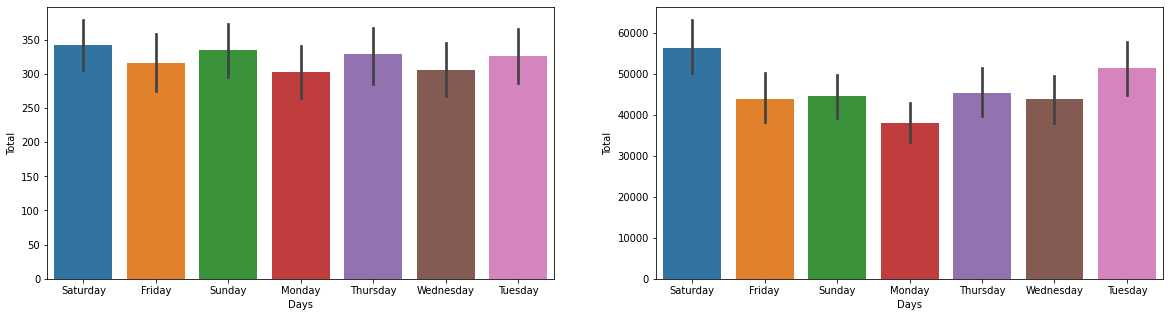

In [40]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.barplot(df["Days"],df["Total"],data=df)
plt.subplot(1,2,2)
sns.barplot(df["Days"],df["Total"],data=df,estimator=sum);

#### Hot selling day of each branch

In [41]:
df.groupby(["Branch","Days"])["Total"].agg(["max","sum","min","mean"]).sort_values(by="mean",ascending=False)

max         sum      min        mean
Branch Days                                                 
C      Friday     1042.6500  14964.7155  16.2015  393.808303
       Sunday      939.5400  17035.7460  23.7510  370.342304
B      Thursday    867.0900  15778.6230  33.9360  358.605068
       Tuesday    1022.3850  18859.2390  33.3585  355.834698
C      Wednesday  1034.4600  17755.8150  23.4990  355.116300
B      Saturday   1022.4900  21284.4240  28.4235  354.740400
A      Saturday    931.0350  16765.4130  12.6945  335.308260
       Thursday    921.1860  15422.2740  30.4080  335.266826
C      Saturday   1023.7500  18070.9725  17.0940  334.647639
       Tuesday     937.8180  17667.7935  13.4190  327.181361
A      Sunday      926.9505  17006.8185  16.1070  327.054202
B      Monday      832.9440  12734.7045  18.6375  326.530885
A      Wednesday   887.9220  13267.7265  32.1405  308.551779
B      Sunday      793.7160  10415.3280  26.7225  297.580800
A      Monday      649.2990  14239.0605  49.7700  296.647094
C      Thursday    829.0800  14148.3510  10.6785  294.757313
A      Tuesday     932.3370  14955.2130  16.2750  293.239471
       Friday     1039.2900  14543.8650  19.1940  290.877300
C      Monday      936.6000  10925.3130  14.6790  287.508237
B      Friday      922.6350  14417.7600  35.1960  282.701176
       Wednesday   666.9390  12707.5935  35.3115  254.151870

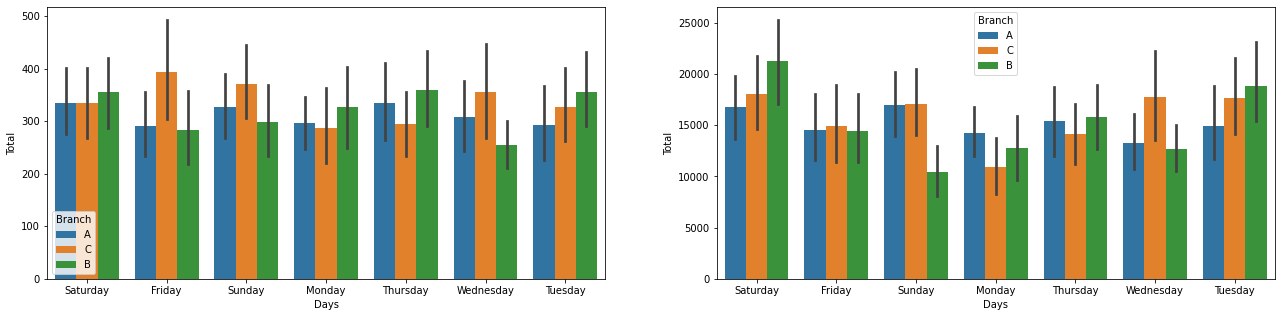

In [42]:
plt.figure(figsize=(22,5))
plt.subplot(1,2,1)
sns.barplot(df["Days"],df["Total"],data=df,hue=df["Branch"])
plt.subplot(1,2,2)
sns.barplot(df["Days"],df["Total"],data=df,hue=df["Branch"],estimator=sum);

#### Customer visiting trend of each branch correspoding to each month

In [43]:
a=df[(df["Branch"] =="A")]
a.head()

,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Days,Month,Weekday
0,A,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2022-12-25 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,Saturday,January,5
2,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2022-12-25 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,Sunday,March,6
3,A,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2022-12-25 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,Sunday,January,6
4,A,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2022-12-25 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,Friday,February,4
6,A,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2019-02-25,2022-12-25 14:36:00,Ewallet,413.04,4.761905,20.6520,5.8,Monday,February,0


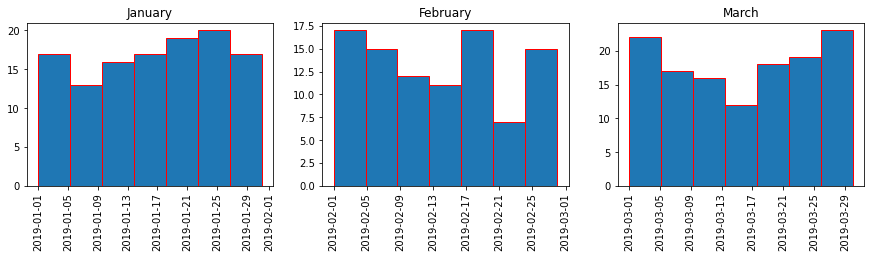

In [44]:
#Branch A
plt.figure(figsize = (15,3))
a=df[(df["Branch"] =="A")]
a_jan=a[a["Month"]=="January"]
plt.subplot(1,3,1)
plt.hist(a_jan["Date"],edgecolor="red",bins=7)
plt.xticks(rotation = 90)
plt.title("January")
a_feb=a[a["Month"]=="February"]
plt.subplot(1,3,2)
plt.hist(a_feb["Date"],edgecolor="red",bins=7)
plt.xticks(rotation = 90)
plt.title("February")
a_march=a[a["Month"]=="March"]
plt.subplot(1,3,3)
plt.hist(a_march["Date"],edgecolor="red",bins=7)
plt.xticks(rotation = 90)
plt.title("March")
plt.show()

- Branch A:
    - January: maximum customers visited in 22-27
    - February: maximum customers visited in 16-20 
    - March: maximum customers visited in 26-29

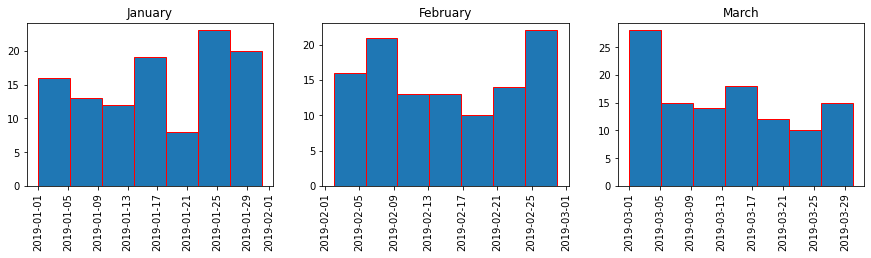

In [45]:
#Branch B
plt.figure(figsize = (15,3))
b=df[(df["Branch"] =="B")]
b_jan=b[b["Month"]=="January"]
plt.subplot(1,3,1)
plt.hist(b_jan["Date"],edgecolor="red",bins=7)
plt.xticks(rotation = 90)
plt.title("January")
b_feb=b[b["Month"]=="February"]
plt.subplot(1,3,2)
plt.hist(b_feb["Date"],edgecolor="red",bins=7)
plt.xticks(rotation = 90)
plt.title("February")
b_march=b[b["Month"]=="March"]
plt.subplot(1,3,3)
plt.hist(b_march["Date"],edgecolor="red",bins=7)
plt.xticks(rotation = 90)
plt.title("March")
plt.show()

- Branch B:
    - January: maximum customers visited in 22-26
    - February: maximum customers visited in 25-28
    - March: maximum customers visited in 1-4

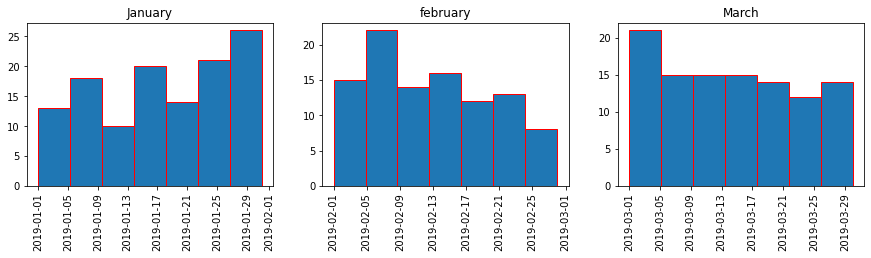

In [46]:
#Branch C
plt.figure(figsize = (15,3))
c=df[(df["Branch"] =="C")]
c_jan=c[c["Month"]=="January"]
plt.subplot(1,3,1)
plt.hist(c_jan["Date"],edgecolor="red",bins=7)
plt.xticks(rotation = 90)
plt.title("January")
c_feb=c[c["Month"]=="February"]
plt.subplot(1,3,2)
plt.hist(c_feb["Date"],edgecolor="red",bins=7)
plt.xticks(rotation = 90)
plt.title("february")
c_march=c[c["Month"]=="March"]
plt.subplot(1,3,3)
plt.hist(c_march["Date"],edgecolor="red",bins=7)
plt.xticks(rotation = 90)
plt.title("March")
plt.show()

- Branch C:
    - January: maximum customers visited in 28-30
    - February: maximum customers visited in 5-8 
    - March: maximum customers visited in 1-5

#### Most popular product of the market

In [47]:
p_index=df['Product line'].value_counts().index
p_index

Index(['Fashion accessories', 'Food and beverages', 'Electronic accessories',
       'Sports and travel', 'Home and lifestyle', 'Health and beauty'],
      dtype='object')

In [48]:
p_values=c['Product line'].value_counts().values
p_values

array([66, 65, 55, 52, 45, 45])

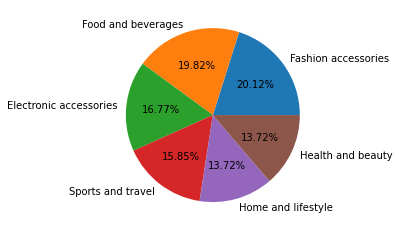

In [49]:
plt.pie(p_values,labels=p_index,autopct='%.2f%%')
plt.show()

#### Product taste trends of customers for each branch (or product demand at each branch)

In [50]:
df.groupby(["Branch"])["Product line"].value_counts()

Branch  Product line          
A       Home and lifestyle        65
        Electronic accessories    60
        Sports and travel         59
        Food and beverages        58
        Fashion accessories       51
        Health and beauty         47
B       Fashion accessories       62
        Sports and travel         62
        Electronic accessories    55
        Health and beauty         53
        Food and beverages        50
        Home and lifestyle        50
C       Food and beverages        66
        Fashion accessories       65
        Electronic accessories    55
        Health and beauty         52
        Home and lifestyle        45
        Sports and travel         45
Name: Product line, dtype: int64

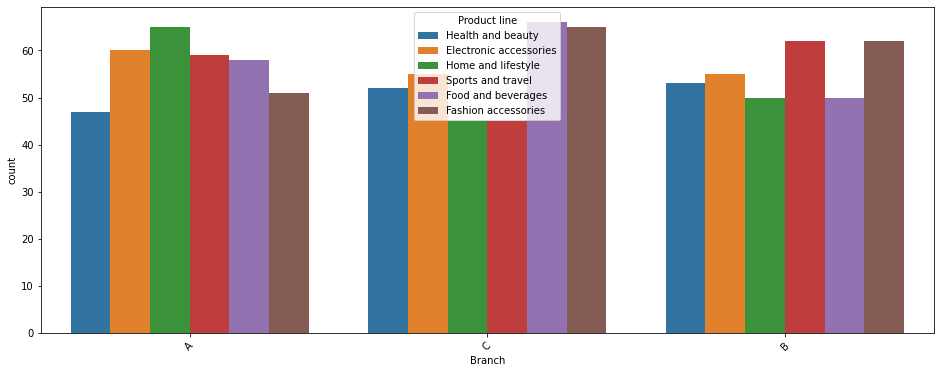

In [51]:
plt.figure(figsize=(16,6))
sns.countplot(x="Branch",data=df,hue="Product line")
plt.xticks(rotation=45);

#### Sales of each product

In [52]:
a=df.groupby(["Product line"])["Total"].sum().sort_values(ascending=False)
a

Product line
Food and beverages        56144.8440
Sports and travel         55122.8265
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Home and lifestyle        53861.9130
Health and beauty         49193.7390
Name: Total, dtype: float64

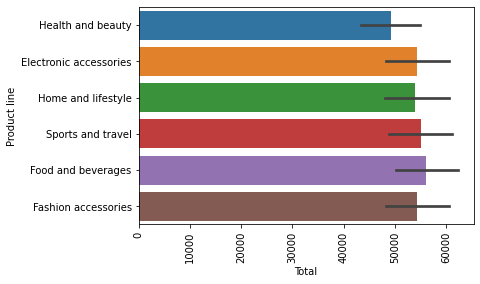

In [53]:
sns.barplot(x="Total",y="Product line",data=df,estimator=sum,orient="h") #orient h shows better, max and min
plt.xticks(rotation=90)
plt.show()

#### Product wise sale trend of each branch

In [54]:
a=df.groupby(["Branch","Product line"])["Total"].sum().sort_values(ascending=False)
a

Branch  Product line          
C       Food and beverages        23766.8550
A       Home and lifestyle        22417.1955
C       Fashion accessories       21560.0700
B       Sports and travel         19988.1990
        Health and beauty         19980.6600
A       Sports and travel         19372.6995
C       Electronic accessories    18968.9745
A       Electronic accessories    18317.1135
B       Home and lifestyle        17549.1645
A       Food and beverages        17163.1005
B       Electronic accessories    17051.4435
C       Health and beauty         16615.3260
B       Fashion accessories       16413.3165
A       Fashion accessories       16332.5085
C       Sports and travel         15761.9280
B       Food and beverages        15214.8885
C       Home and lifestyle        13895.5530
A       Health and beauty         12597.7530
Name: Total, dtype: float64

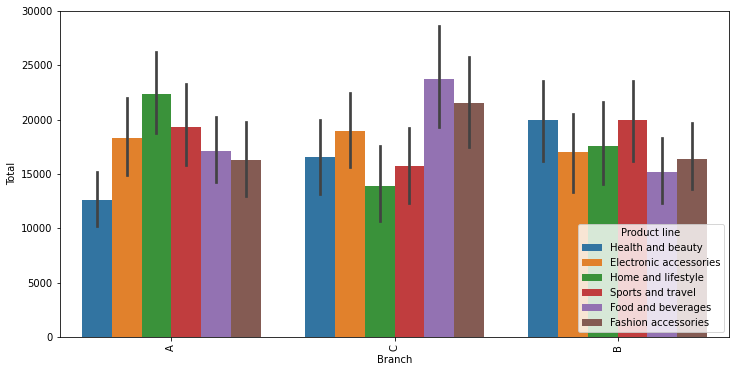

In [55]:
plt.figure(figsize=(12,6))
sns.barplot(x="Branch",y="Total",hue="Product line",data=df,estimator=sum)
plt.xticks(rotation=90);

#### Monthly sale of each product

In [56]:
a=df.groupby(["Month","Product line"])["Total"].sum()
a

Month     Product line          
February  Electronic accessories    17362.9050
          Fashion accessories       19009.8615
          Food and beverages        20000.3580
          Health and beauty         14602.2555
          Home and lifestyle        12434.3835
          Sports and travel         13809.6105
January   Electronic accessories    18831.2880
          Fashion accessories       19345.1160
          Food and beverages        19570.5300
          Health and beauty         16383.1710
          Home and lifestyle        20494.7400
          Sports and travel         21667.0230
March     Electronic accessories    18143.3385
          Fashion accessories       15950.9175
          Food and beverages        16573.9560
          Health and beauty         18208.3125
          Home and lifestyle        20932.7895
          Sports and travel         19646.1930
Name: Total, dtype: float64

<AxesSubplot:xlabel='Month', ylabel='Total'>

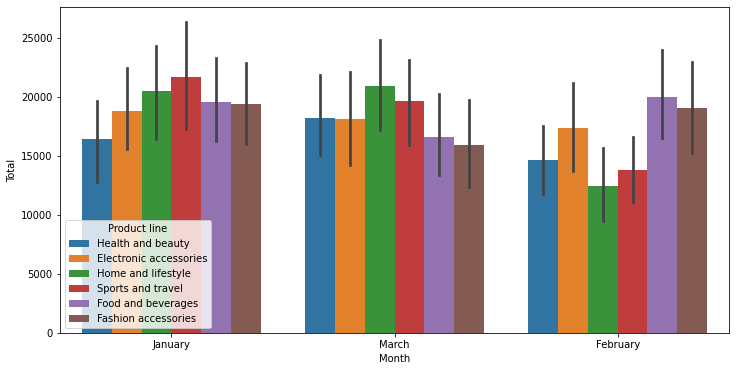

In [57]:
plt.figure(figsize=(12,6))
sns.barplot(x="Month",y="Total",hue="Product line",data=df,estimator=sum)

#### Total number of customers

In [58]:
print("total customers:",df["Gender"].count())
df["Gender"].value_counts()

total customers: 1000


Female    501
Male      499
Name: Gender, dtype: int64

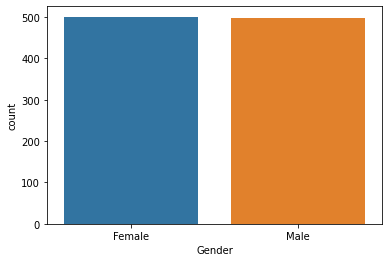

In [59]:
sns.countplot("Gender",data=df);

#### Customer product taste according to gender

In [60]:
a=df.groupby(["Branch","Product line"])["Gender"].value_counts()
a

Branch  Product line            Gender
A       Electronic accessories  Male      32
                                Female    28
        Fashion accessories     Female    28
                                Male      23
        Food and beverages      Male      35
                                Female    23
        Health and beauty       Male      26
                                Female    21
        Home and lifestyle      Male      33
                                Female    32
        Sports and travel       Male      30
                                Female    29
B       Electronic accessories  Female    28
                                Male      27
        Fashion accessories     Female    33
                                Male      29
        Food and beverages      Female    29
                                Male      21
        Health and beauty       Male      33
                                Female    20
        Home and lifestyle      Male      28
                

#### Gender that contributed most

In [61]:
df.groupby("Gender")["Total"].agg(["sum","mean"])

,sum,mean
Gender,,
Female,167882.925,335.095659
Male,155083.824,310.789226


#### Total sale of each product by gender

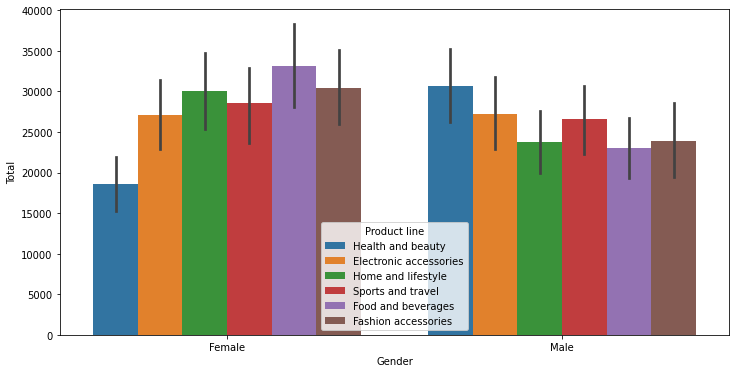

In [62]:
plt.figure(figsize=(12,6))
sns.barplot(x="Gender",y="Total",data=df,hue="Product line",estimator=sum);

#### Branch with highest number of customers

In [63]:

df.groupby(["Branch"])["Customer type"].count()

Branch
A    340
B    332
C    328
Name: Customer type, dtype: int64

#### How many customers were members or were normal customers

In [64]:
df['Customer type'].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

#### Classify total income based on customer type

In [65]:
df.groupby(["Customer type"])["Total"].sum()

Customer type
Member    164223.444
Normal    158743.305
Name: Total, dtype: float64

#### Customers type count of each branch

In [66]:
df.groupby(["Branch"])["Customer type"].value_counts()

Branch  Customer type
A       Normal           173
        Member           167
B       Normal           167
        Member           165
C       Member           169
        Normal           159
Name: Customer type, dtype: int64

#### Peak time of customers visiting

In [67]:
df["Time"].mode()

0   2022-12-25 14:42:00
1   2022-12-25 19:48:00
dtype: datetime64[ns]

- Adding hour for better analysis

In [68]:
df["Hour"]=df["Time"].dt.hour
df.head()

,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Days,Month,Weekday,Hour
0,A,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2022-12-25 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,Saturday,January,5,13
1,C,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2022-12-25 10:29:00,Cash,76.40,4.761905,3.8200,9.6,Friday,March,4,10
2,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2022-12-25 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,Sunday,March,6,13
3,A,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2022-12-25 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,Sunday,January,6,20
4,A,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2022-12-25 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,Friday,February,4,10


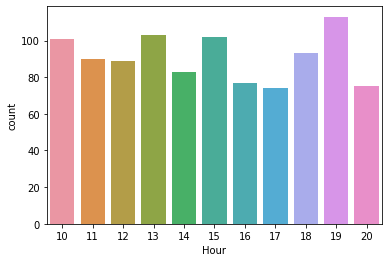

In [69]:
sns.countplot(x="Hour",data=df);

- 19 o'clock is peak time of customer visits.

#### Product sales per hour

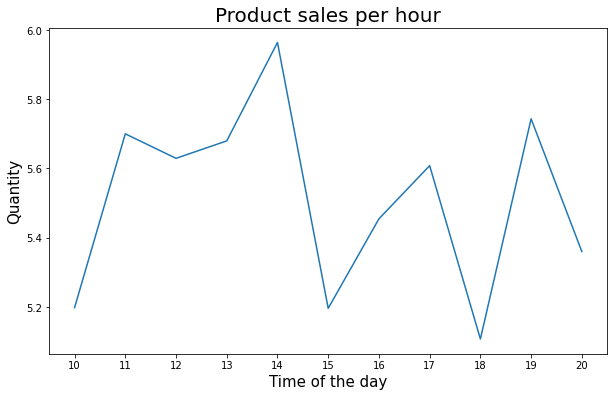

In [70]:
plt.figure(figsize=(10,6))
sns.lineplot(x='Hour',y='Quantity',data=df,ci=None) #ci: confidence interval (part of stats)
plt.title('Product sales per hour', fontsize=20)
plt.xlabel('Time of the day', fontsize=15)
plt.xticks(df['Hour'].unique())
# plt.yticks(df['Quantity'].unique())
plt.ylabel('Quantity', fontsize=15);

- Highest sale at 2 pm. 

#### Hot selling time of each time

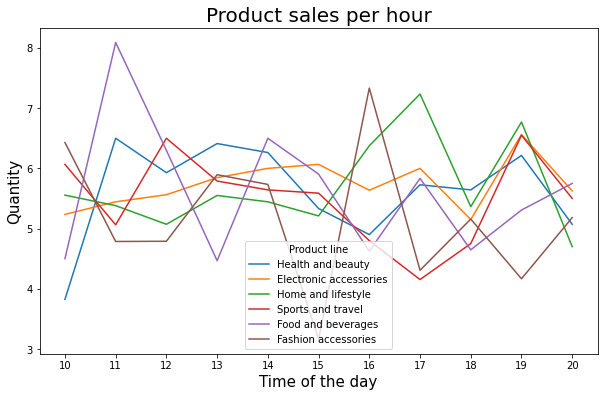

In [71]:
plt.figure(figsize=(10,6))
sns.lineplot(x='Hour',y='Quantity',data=df,hue="Product line",ci=None)
plt.title('Product sales per hour', fontsize=20)
plt.xlabel('Time of the day', fontsize=15)
plt.xticks(df['Hour'].unique())
# plt.yticks(df['Quantity'].unique())
plt.ylabel('Quantity', fontsize=15);

- Health and beauty products have no specific peak time of purchase. 
- Home and lifestyle are recorded around 5 pm and 7 pm,which is an ideal time time for home makers to make such purchases. 
- Food and beverages are seen to be purchased more at 11 am.
- Fashion accessories are seen to be purchsed at 4 pm which can be an ideal time not only for adults but also for teenagers.
- Electronic sales are seen around 7 pm.

#### Highest, lowest, and average rating of the company

In [72]:
df["Rating"].agg(["max","min","mean"])

max     10.0000
min      4.0000
mean     6.9727
Name: Rating, dtype: float64

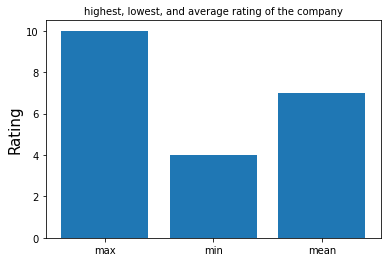

In [73]:
plt.bar(df["Rating"].agg(["max","min","mean"]).index,df["Rating"].agg(["max","min","mean"]).values)
plt.title('highest, lowest, and average rating of the company', fontsize=10)
plt.ylabel('Rating', fontsize=15);

#### Customers who have given 10 rating

In [74]:
print(len(df[df["Rating"]==10.0]), "customers had given 10 rating")
print((len(df[df["Rating"]==10.0])*100)/df["Rating"].count(),"% customers had given 10 rating")

5 customers had given 10 rating
0.5 % customers had given 10 rating


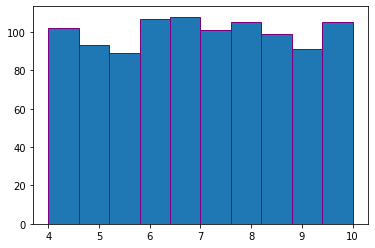

In [75]:
plt.hist(df["Rating"],edgecolor="purple"); #rating starts from 4 and goes till 10

In [76]:
len(df[df["Rating"]>=9.0])

166

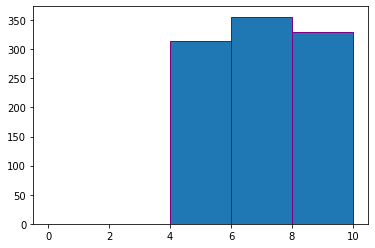

In [77]:
plt.hist(df["Rating"],edgecolor="purple",bins=[0,2,4,6,8,10]);

#### Customer who have given highest,lowest, average rating at each branch

In [78]:
x=df.groupby(["Branch"])["Rating"].agg(["max","min","mean"])
x.reset_index()

,Branch,max,min,mean
0,A,10.0,4.0,7.027059
1,B,10.0,4.0,6.818072
2,C,10.0,4.0,7.072866


#### Most liked product category liked by customers

In [79]:
df.groupby(["Product line"])["Rating"].agg(["mean","max","min"])

,mean,max,min
Product line,,,
Electronic accessories,6.924706,10.0,4.0
Fashion accessories,7.029213,9.9,4.0
Food and beverages,7.113218,9.9,4.0
Health and beauty,7.003289,10.0,4.0
Home and lifestyle,6.837500,9.9,4.1
Sports and travel,6.916265,10.0,4.0


#### Most liked product category by customers from each branch

In [80]:

df.groupby(["Branch","Product line"])["Rating"].agg(["max","mean","min"])

max      mean  min
Branch Product line                               
A      Electronic accessories   9.9  6.911667  4.3
       Fashion accessories      9.9  6.878431  4.0
       Food and beverages       9.9  7.253448  4.0
       Health and beauty       10.0  6.900000  4.2
       Home and lifestyle       9.9  6.930769  4.1
       Sports and travel        9.9  7.257627  4.1
B      Electronic accessories  10.0  7.116364  4.0
       Fashion accessories      9.9  6.722581  4.1
       Food and beverages       9.9  6.994000  4.0
       Health and beauty        9.9  7.100000  4.0
       Home and lifestyle       9.8  6.516000  4.1
       Sports and travel       10.0  6.509677  4.1
C      Electronic accessories   9.8  6.747273  4.1
       Fashion accessories      9.9  7.440000  4.0
       Food and beverages       9.9  7.080303  4.0
       Health and beauty        9.9  6.998077  4.1
       Home and lifestyle       9.8  7.060000  4.3
       Sports and travel       10.0  7.028889  4.0

#### Number of e-wallet, credit card and cash paying customers

In [81]:
df["Payment"].value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

#### Number of e-wallet, credit card and cash paying customers of each branch

In [82]:
df.groupby(["Branch"])["Payment"].value_counts()

Branch  Payment    
A       Ewallet        126
        Cash           110
        Credit card    104
B       Ewallet        113
        Cash           110
        Credit card    109
C       Cash           124
        Ewallet        106
        Credit card     98
Name: Payment, dtype: int64

#### Type of payers who lead to most sale

In [83]:
df.groupby(["Branch","Payment"])["Total"].sum()

Branch  Payment    
A       Cash           33781.2510
        Credit card    33094.7505
        Ewallet        39324.3690
B       Cash           35339.4615
        Credit card    37344.8565
        Ewallet        33513.3540
C       Cash           43085.8575
        Credit card    30327.4650
        Ewallet        37155.3840
Name: Total, dtype: float64

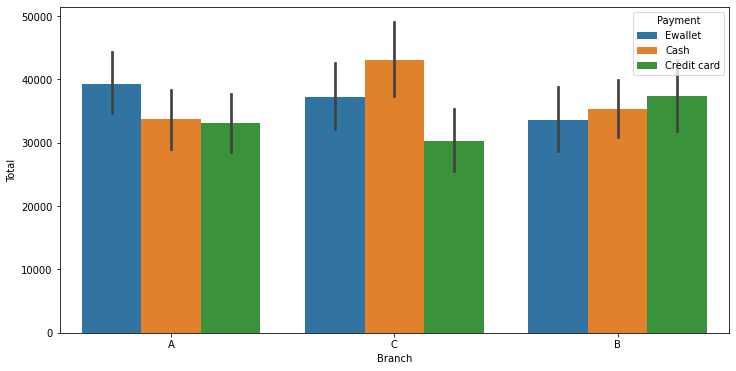

In [84]:
plt.figure(figsize=(12,6))
sns.barplot(x="Branch",y="Total",data=df,hue="Payment",estimator=sum);